In [54]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scanpy as sc
import pycea as py

import importlib
import os
import numpy as np
import pandas as pd
import anndata


file_path = os.path.join(os.getcwd(), "../src/spotr/", "utils.py")
spec = importlib.util.spec_from_file_location("utils", file_path)
utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils)

file_path = os.path.join(os.getcwd(), "../src/spotr/", "visium_simulator.py")
spec = importlib.util.spec_from_file_location("visium_simulator", file_path)
visium_simulator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(visium_simulator)


file_path = os.path.join(os.getcwd(), "../src/spotr/", "spotr.py")
spec = importlib.util.spec_from_file_location("spotr", file_path)
spotr = importlib.util.module_from_spec(spec)
spec.loader.exec_module(spotr)

file_path = os.path.join(os.getcwd(), "../benchmark/DestVI/", "destvi.py")
spec = importlib.util.spec_from_file_location("destvi", file_path)
destvi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(destvi)

file_path = os.path.join(os.getcwd(), "../benchmark/scDOT/", "scdot.py")
spec = importlib.util.spec_from_file_location("scdot", file_path)
scdot = importlib.util.module_from_spec(spec)
spec.loader.exec_module(scdot)

In [2]:
tdata = py.datasets.koblan25()
tdata

Using cached dataset koblan25_tumor.h5td from /home/pedro/.treedata/datasets/koblan25_tumor.h5td


TreeData object with n_obs × n_vars = 145954 × 175
    obs: 'sample', 'cell', 'cellBC', 'fov', 'centroid_x', 'centroid_y', 'centroid_z', 'n_layers', 'volume', 'n_genes_by_counts', 'total_counts', 'cell_subtype', 'true_proportion', 'diffusion_proportion', 'background_proportion', 'total_density', 'tumor', 'tumor_boundary_dist', 'within_tumor', 'lung_boundary_dist', 'type', 'clone', 'detection_rate', 'tree', 'fitness', 'clade', 'character_dist_of_relatives', 'local_character_diversity', 'hotspot_module', 'phase', 'edit_frac', 'leiden_cluster'
    uns: 'clone_characters', 'clone_colors', 'hotspot_module_colors', 'leiden_cluster_colors', 'within_tumor_colors'
    obsm: 'X_resolVI', 'X_umap', 'characters', 'module_scores', 'resolvi_celltypes', 'spatial', 'spatial_grid', 'spatial_overlay', 'subtype_density'
    obst: 'tree'

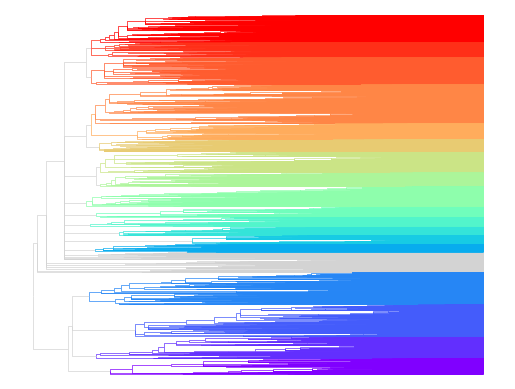

In [3]:
clade_palette = py.get.palette(tdata, key="clade", cmap="rainbow")
py.pl.tree(tdata, depth_key="time", branch_color="clade", palette=clade_palette, legend=False);

/tmp/ipykernel_2125214/1135318084.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata, color="clade", spot_size=40, frameon=False, legend_loc=None)


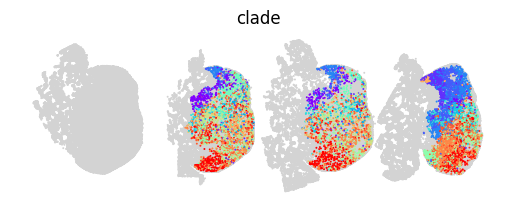

In [4]:
sc.pl.spatial(tdata, color="clade", spot_size=40, frameon=False, legend_loc=None)


In [5]:
n_extant = py.tl.n_extant(tdata, depth_key="time", groupby="clade", bins=20, dropna=True, copy=True)
n_extant.sort_values(["clade", "time"]).head(10)

time  n_extant  tree clade
378   0.00         0  tree     1
379   1.75         0  tree     1
380   3.50         1  tree     1
381   5.25         1  tree     1
382   7.00         3  tree     1
383   8.75         4  tree     1
384  10.50         4  tree     1
385  12.25         7  tree     1
386  14.00        16  tree     1
387  15.75        23  tree     1

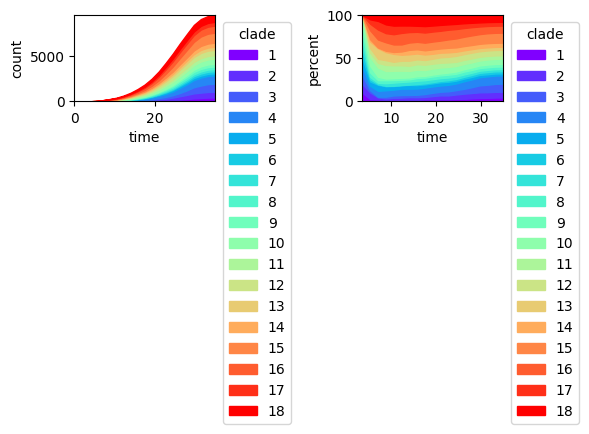

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
py.pl.n_extant(tdata, ax=axes[0])
py.pl.n_extant(tdata, ax=axes[1], stat="percent")
plt.tight_layout()

In [7]:
py.tl.fitness(tdata, depth_key="time", method="sbd")

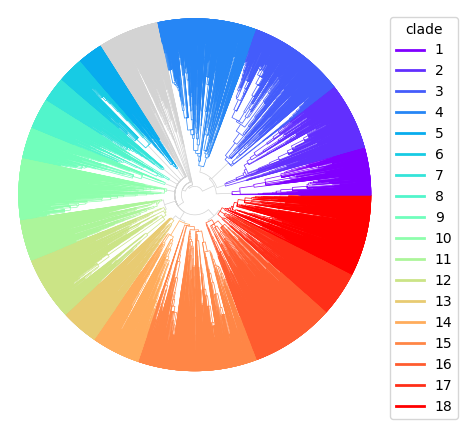

In [8]:
ax = py.pl.tree(tdata, depth_key="time", branch_color="clade", palette=clade_palette, polar=True)
ax.figure.savefig("tree.pdf")
# py.pl.annotation(tdata, keys="fitness", width=0.2, cmap="magma");

/tmp/ipykernel_2125214/3638498150.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata, color="fitness", spot_size=40, frameon=False, cmap="magma");


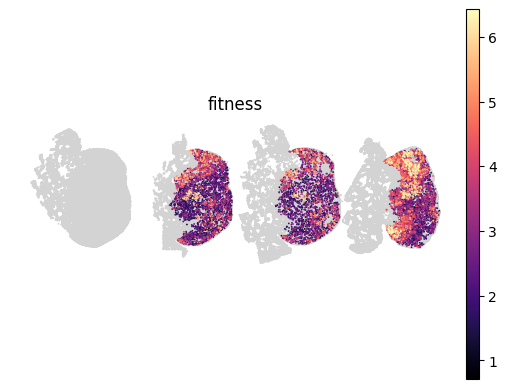

In [9]:
sc.pl.spatial(tdata, color="fitness", spot_size=40, frameon=False, cmap="magma");

/tmp/ipykernel_2125214/163125774.py:6: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");
/home/pedro/.local/lib/python3.10/site-packages/scanpy/plotting/_utils.py:481: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


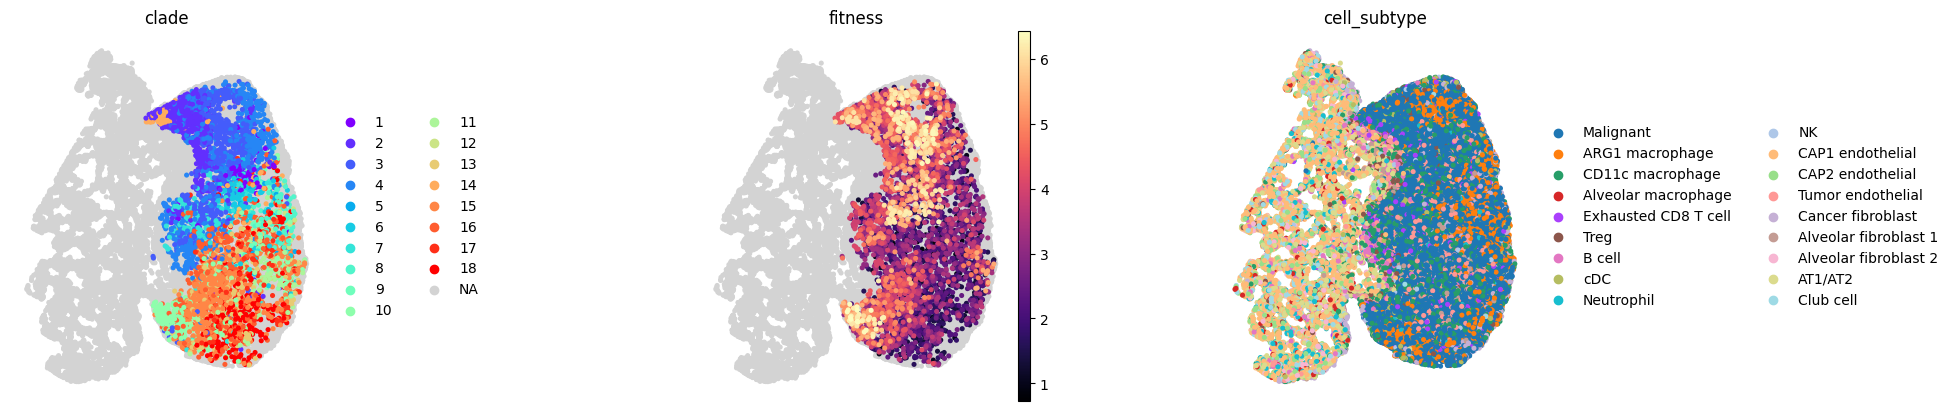

In [15]:
# Select one slice
tdata.obs["slice"] = tdata.obs["sample"].apply(lambda x: "slice_" + x.split("-")[1])

tdata_slice = tdata[tdata.obs["slice"] == "slice_4"]
tdata_slice.obs["slice"].value_counts()
sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");

In [16]:
# Subset to only cancer cells in the tree
import pandas as pd
tdata_slice = tdata_slice[~pd.isna(tdata_slice.obs["clade"])]

/tmp/ipykernel_2125214/65159344.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");
/home/pedro/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


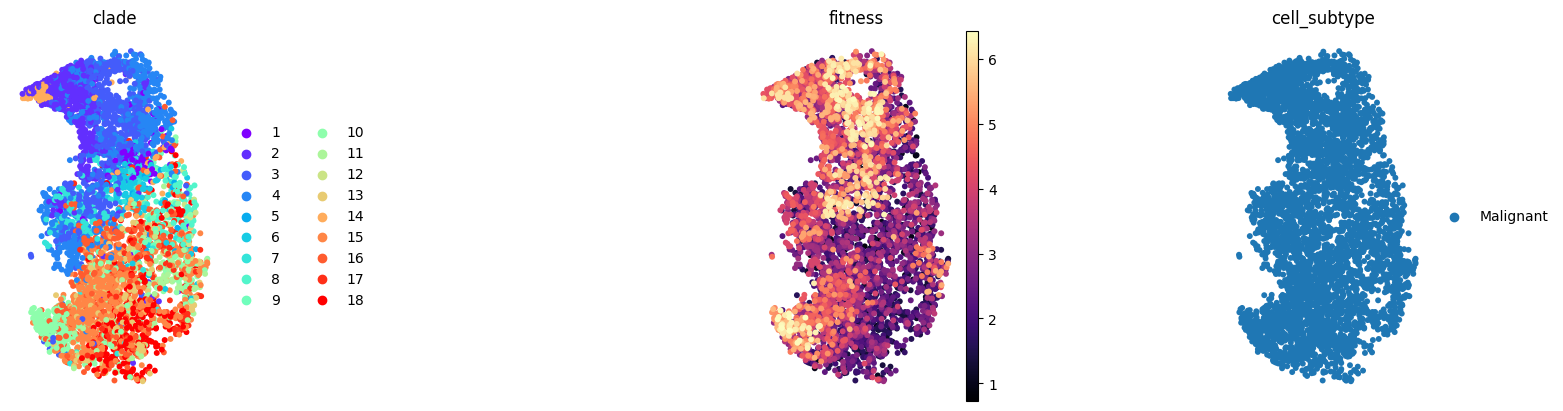

In [17]:
sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");

In [18]:
# utils.annotate_clades(tdata_slice, max_depth=4)

/tmp/ipykernel_2125214/1672439302.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["clade", "fitness"], spot_size=40, frameon=False, cmap="magma");


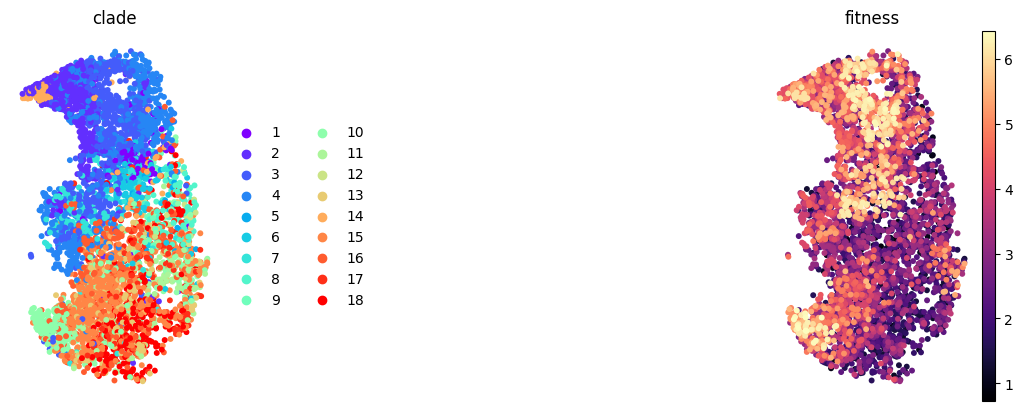

In [19]:
sc.pl.spatial(tdata_slice, color=["clade", "fitness"], spot_size=40, frameon=False, cmap="magma");

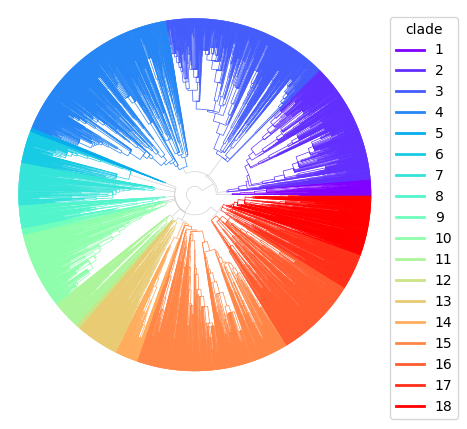

In [20]:
ax = py.pl.tree(tdata_slice, depth_key="time", branch_color="clade", palette=clade_palette, polar=True)
ax.figure.savefig("tree.pdf")

In [21]:
tdata_slice.obs['cell_subtype'].value_counts()

cell_subtype
Malignant    4562
Name: count, dtype: int64

In [22]:
expr = sc.get.obs_df(tdata_slice, keys=list(tdata_slice.var_names))
expr.corrwith(tdata_slice.obs["fitness"]).sort_values(ascending=False).head(10)

Cldn4     0.194812
Lef1      0.134419
Fgf1      0.124902
Fgfbp1    0.111290
Ung       0.077443
Tcf7      0.061060
Cdca2     0.060672
Inava     0.048652
Foxm1     0.048493
Gpr141    0.045877
dtype: float64

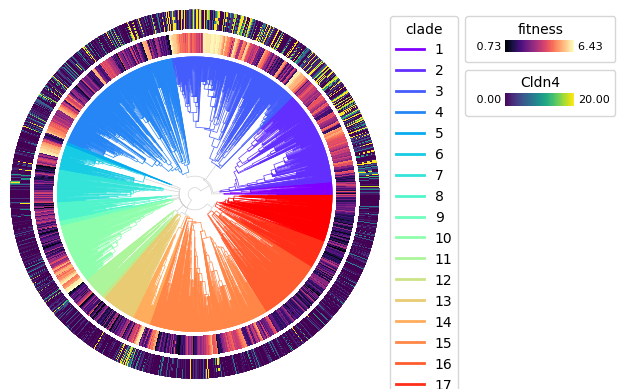

In [23]:
py.pl.tree(tdata_slice, depth_key="time", branch_color="clade",  polar=True)
py.pl.annotation(tdata_slice, keys="fitness", width=0.15, cmap="magma")
py.pl.annotation(tdata_slice, keys="Cldn4", width=0.15, vmax=20);

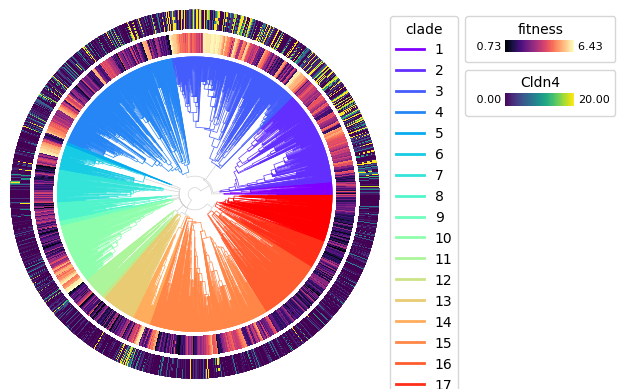

In [24]:
# tdata_slice.obs['Clade'] = tdata_slice.obs['clade_depth4']
# tdata_slice.uns['Clade_colors'] = tdata_slice.uns['clade_depth4_colors']
py.pl.tree(tdata_slice, depth_key="time", branch_color="clade", polar=True)
py.pl.annotation(tdata_slice, keys="fitness", width=0.15, cmap="magma")
py.pl.annotation(tdata_slice, keys="Cldn4", width=0.15, vmax=20);

In [25]:
py.tl.tree_neighbors(tdata_slice, n_neighbors=10)
heritability = py.tl.autocorr(tdata_slice, method="moran", copy=True)
heritability.sort_values("autocorr", ascending=False).head(10)

autocorr  pval_norm  var_norm
Cldn4  0.184429        0.0  0.000015
Lef1   0.151394        0.0  0.000015
Itgb4  0.140075        0.0  0.000015
Sdc1   0.133743        0.0  0.000015
Krt19  0.128383        0.0  0.000015
Sox9   0.122784        0.0  0.000015
Vegfa  0.120275        0.0  0.000015
Nes    0.105916        0.0  0.000015
Fgf1   0.103453        0.0  0.000015
Wnt7b  0.102787        0.0  0.000015

In [26]:
tdata_slice

TreeData object with n_obs × n_vars = 4562 × 175
    obs: 'sample', 'cell', 'cellBC', 'fov', 'centroid_x', 'centroid_y', 'centroid_z', 'n_layers', 'volume', 'n_genes_by_counts', 'total_counts', 'cell_subtype', 'true_proportion', 'diffusion_proportion', 'background_proportion', 'total_density', 'tumor', 'tumor_boundary_dist', 'within_tumor', 'lung_boundary_dist', 'type', 'clone', 'detection_rate', 'tree', 'fitness', 'clade', 'character_dist_of_relatives', 'local_character_diversity', 'hotspot_module', 'phase', 'edit_frac', 'leiden_cluster', 'slice'
    uns: 'clone_characters', 'clone_colors', 'hotspot_module_colors', 'leiden_cluster_colors', 'within_tumor_colors', 'clade_colors', 'n_extant', 'cell_subtype_colors', 'tree_neighbors', 'moranI'
    obsm: 'X_resolVI', 'X_umap', 'characters', 'module_scores', 'resolvi_celltypes', 'spatial', 'spatial_grid', 'spatial_overlay', 'subtype_density'
    obsp: 'tree_distances', 'tree_connectivities'
    obst: 'tree'

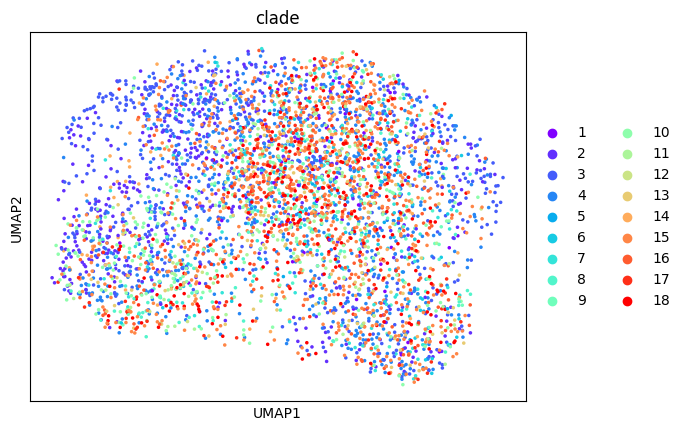

In [27]:
tdata_slice.layers['counts'] = tdata_slice.X.toarray().copy()
sc.pp.normalize_total(tdata_slice)
sc.pp.log1p(tdata_slice)
sc.tl.pca(tdata_slice)
sc.pp.neighbors(tdata_slice)
sc.tl.leiden(tdata_slice, flavor="igraph")
sc.tl.umap(tdata_slice, random_state=0)
sc.pl.umap(tdata_slice, color=["clade"])

In [28]:
tdata_slice.obs['clade']

M3-4-5151      2
M3-4-5194     14
M3-4-5200     14
M3-4-5205      2
M3-4-5211      2
              ..
M3-4-77763    18
M3-4-77833    17
M3-4-77916    13
M3-4-77988    16
M3-4-77989    13
Name: clade, Length: 4562, dtype: category
Categories (18, object): ['1' < '2' < '3' < '4' ... '15' < '16' < '17' < '18']

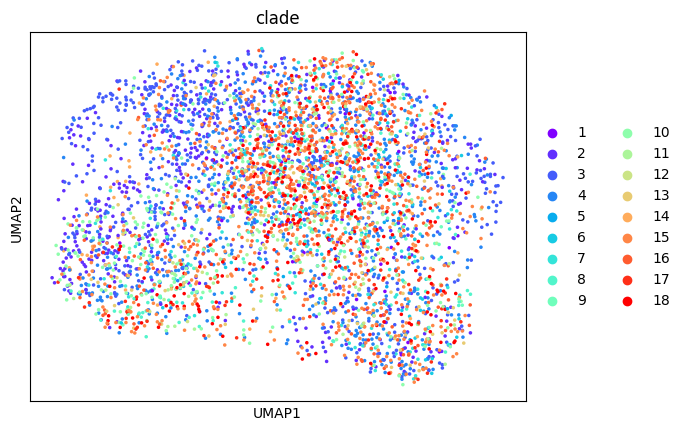

In [29]:
sc.pl.umap(tdata_slice, color=["clade"])

/tmp/ipykernel_2125214/743697300.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["hotspot_module"], spot_size=40, frameon=False, cmap="magma");


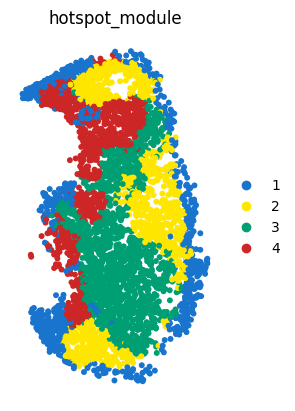

In [30]:
sc.pl.spatial(tdata_slice, color=["hotspot_module"], spot_size=40, frameon=False, cmap="magma");

In [31]:
tdata_slice

TreeData object with n_obs × n_vars = 4562 × 175
    obs: 'sample', 'cell', 'cellBC', 'fov', 'centroid_x', 'centroid_y', 'centroid_z', 'n_layers', 'volume', 'n_genes_by_counts', 'total_counts', 'cell_subtype', 'true_proportion', 'diffusion_proportion', 'background_proportion', 'total_density', 'tumor', 'tumor_boundary_dist', 'within_tumor', 'lung_boundary_dist', 'type', 'clone', 'detection_rate', 'tree', 'fitness', 'clade', 'character_dist_of_relatives', 'local_character_diversity', 'hotspot_module', 'phase', 'edit_frac', 'leiden_cluster', 'slice', 'leiden'
    uns: 'clone_characters', 'clone_colors', 'hotspot_module_colors', 'leiden_cluster_colors', 'within_tumor_colors', 'clade_colors', 'n_extant', 'cell_subtype_colors', 'tree_neighbors', 'moranI', 'log1p', 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_resolVI', 'X_umap', 'characters', 'module_scores', 'resolvi_celltypes', 'spatial', 'spatial_grid', 'spatial_overlay', 'subtype_density', 'X_pca'
    varm: 'PCs'
    layers: 'counts

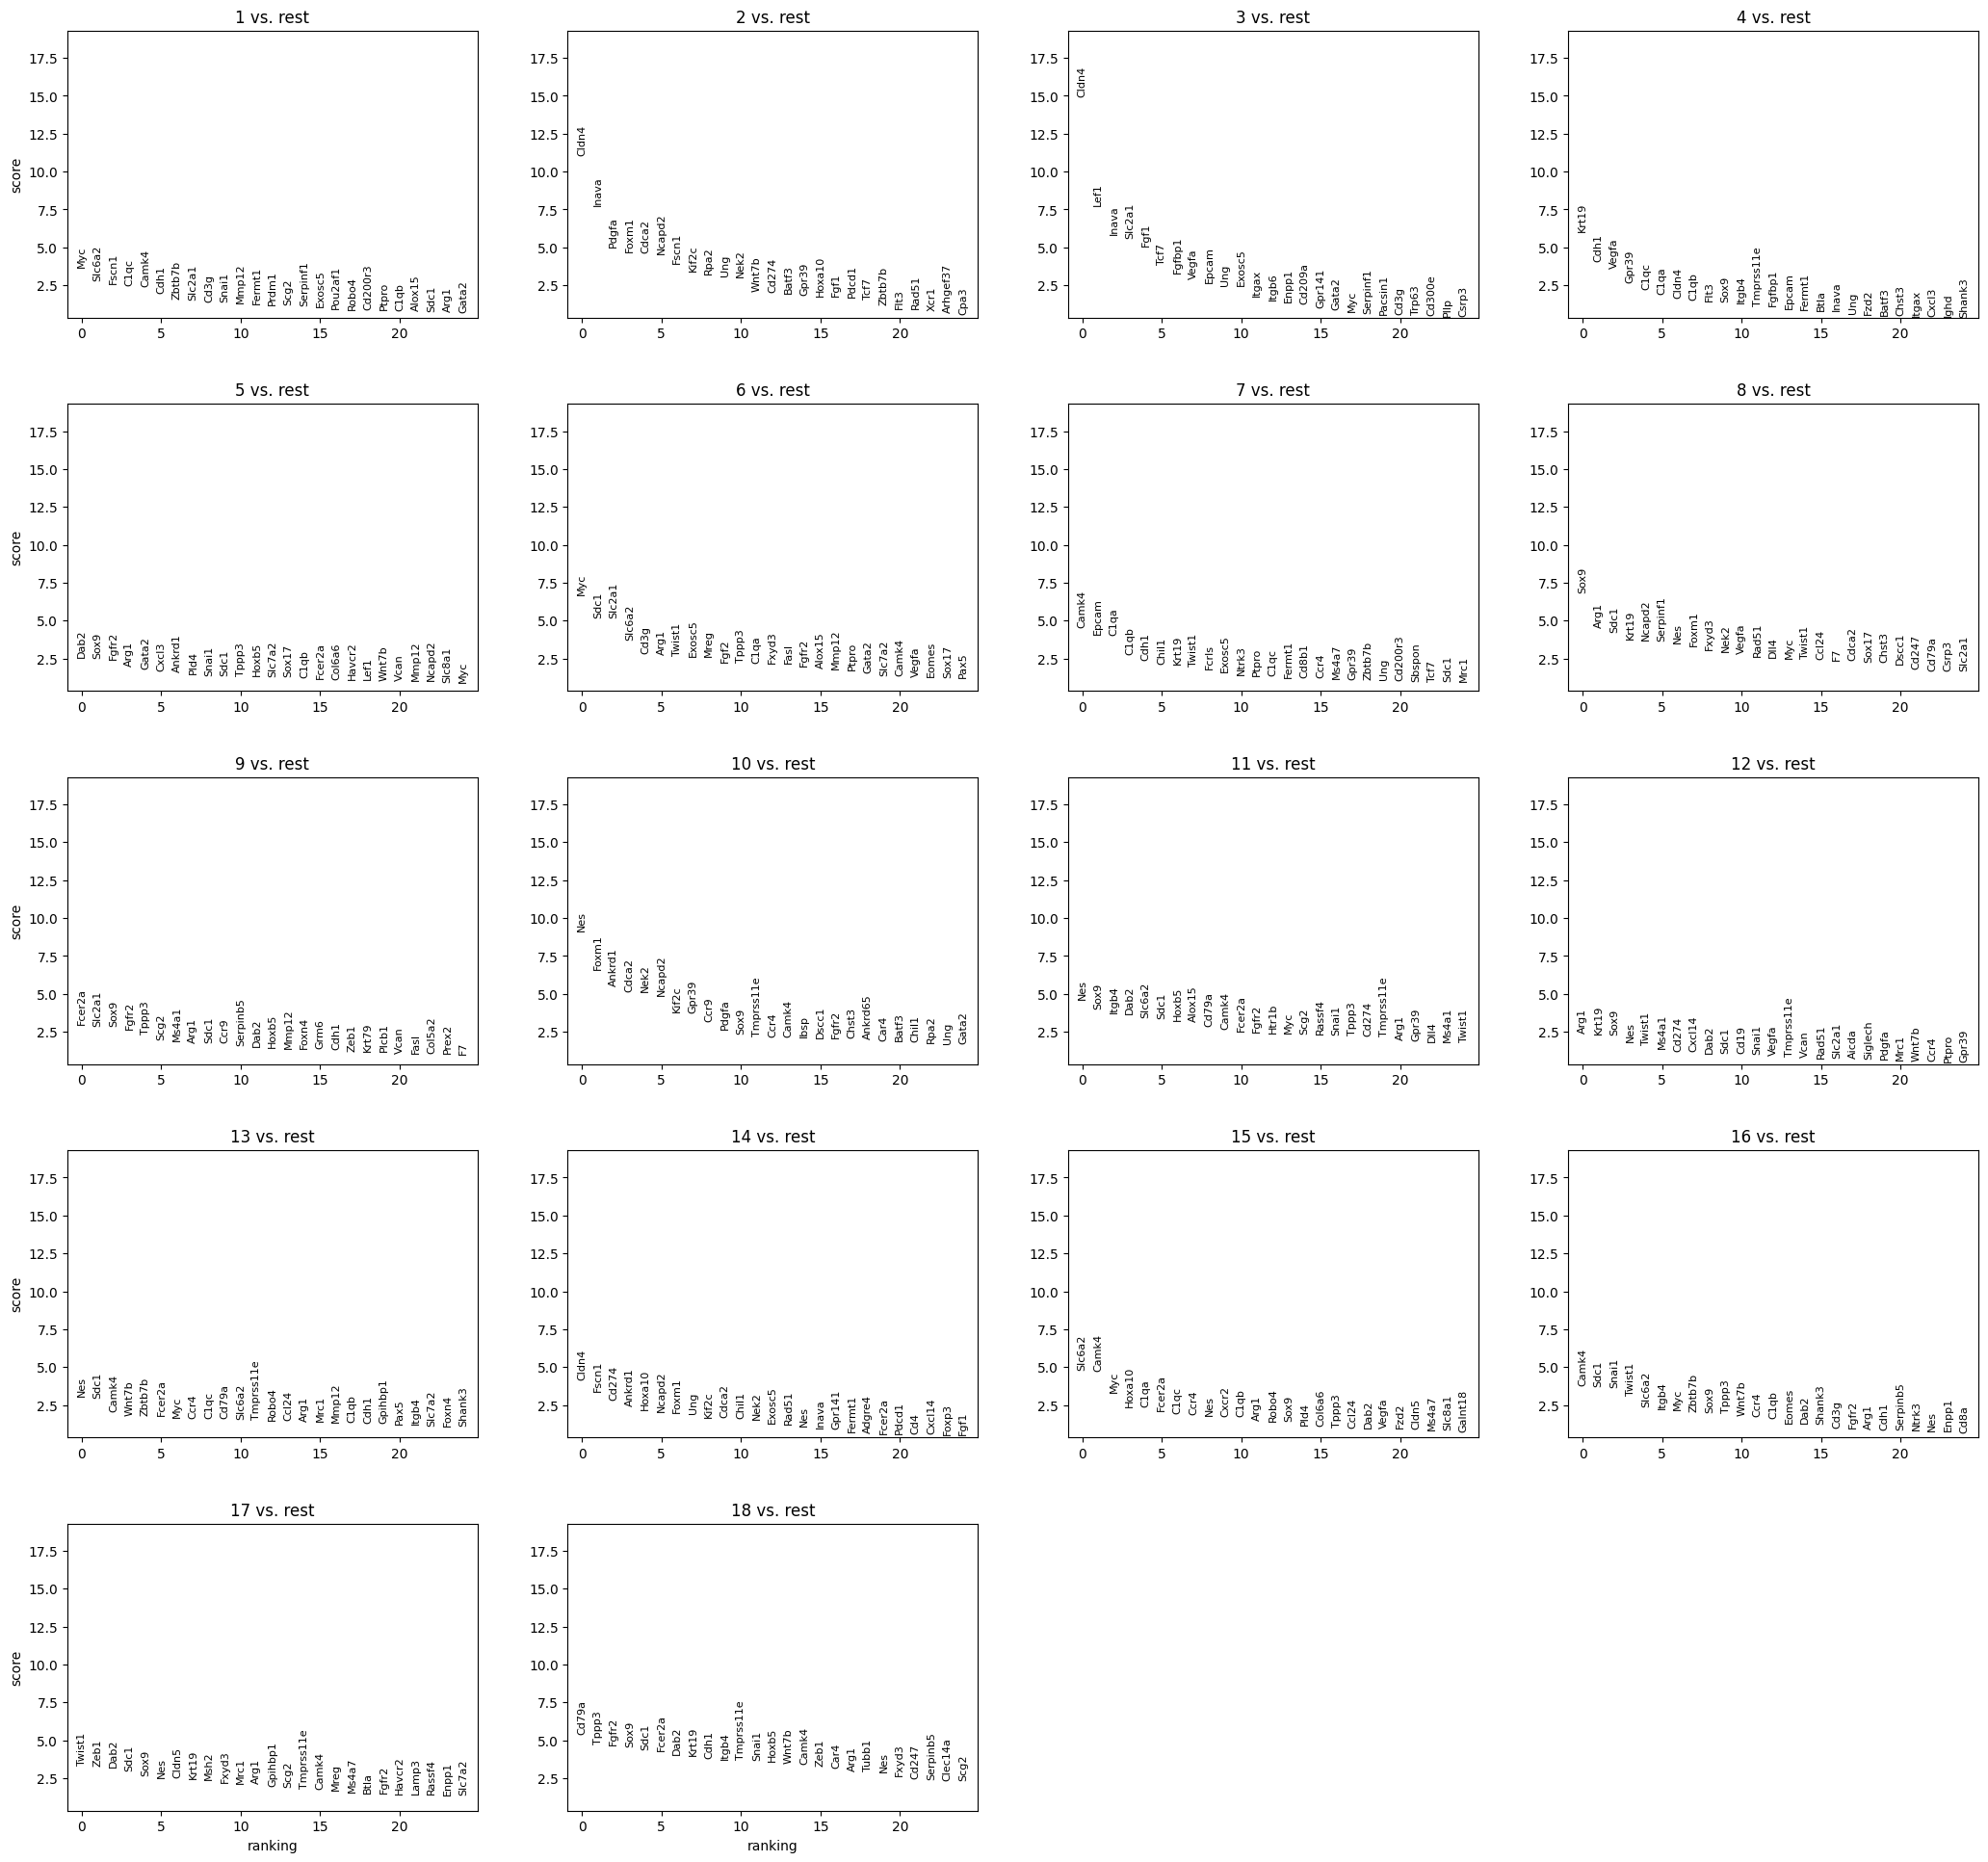

18    31
11    26
8     20
10    18
17    13
6     11
3     10
2      7
15     7
9      7
7      6
5      6
13     5
4      4
1      1
12     1
14     1
16     1
Name: count, dtype: int64

In [32]:
# Get the genes for the modules
sc.tl.rank_genes_groups(tdata_slice, "clade", method="wilcoxon")
sc.pl.rank_genes_groups(tdata_slice, n_genes=25)

# # Get matrix of scores of genes in modules
d = []
modules = tdata_slice.obs["clade"].unique()
for module in modules:
    df = sc.get.rank_genes_groups_df(tdata_slice, module)
    df.set_index('names', inplace=True)
    d.append(df['scores'])
modules_by_genes = pd.concat(d, axis=1)
modules_by_genes.columns = modules
# Assign each gene to the module with the highest score
gene_module_assignments = modules_by_genes.idxmax(axis=1)

# Create a binary matrix: gene x module
gene_by_module_binary = pd.get_dummies(gene_module_assignments)

gene_by_module_binary
# How many genes in each module?
genes_per_module = gene_module_assignments.value_counts()
genes_per_module


In [33]:
# Create binary cell by module matrix with cell to module assignments
# For each cell, identify its module assignment and build the binary matrix
cell_module_assignments = tdata_slice.obs["clade"]
cell_by_module_binary = pd.get_dummies(cell_module_assignments)
cell_by_module_binary

1      2      3      4      5      6      7      8      9  \
M3-4-5151   False   True  False  False  False  False  False  False  False   
M3-4-5194   False  False  False  False  False  False  False  False  False   
M3-4-5200   False  False  False  False  False  False  False  False  False   
M3-4-5205   False   True  False  False  False  False  False  False  False   
M3-4-5211   False   True  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
M3-4-77763  False  False  False  False  False  False  False  False  False   
M3-4-77833  False  False  False  False  False  False  False  False  False   
M3-4-77916  False  False  False  False  False  False  False  False  False   
M3-4-77988  False  False  False  False  False  False  False  False  False   
M3-4-77989  False  False  False  False  False  False  False  False  False   

               10     11     12     13     14     15     16     17     18  
M3-4-5151   False  False  False  False  False  False  False  False  False  
M3-4-5194   False  False  False  False   True  False  False  False  False  
M3-4-5200   False  False  False  False   True  False  False  False  False  
M3-4-5205   False  False  False  False  False  False  False  False  False  
M3-4-5211   False  False  False  False  False  False  False  False  False  
...           ...    ...    ...    ...    ...    ...    ...    ...    ...  
M3-4-77763  False  False  False  False  False  False  False  False   True  
M3-4-77833  False  False  False  False  False  False  False   True  False  
M3-4-77916  False  False  False   True  False  False  False  False  False  
M3-4-77988  False  False  False  False  False  False   True  False  False  
M3-4-77989  False  False  False   True  False  False  False  False  False  

[4562 rows x 18 columns]

In [34]:
cell_type_signatures = gene_by_module_binary.loc[tdata_slice.var_names].T.values.astype(float)
cell_type_assignments = cell_by_module_binary.loc[tdata_slice.obs.index].values.astype(float)

NameError: name 'sdata_slice' is not defined

In [35]:
# fig, axes = plt.subplots(1, 2, figsize=(9, 4))
# sc.pl.umap(tdata_slice, color=["leiden"], ax=axes[0], show=False)
# py.pl.tree(tdata_slice, keys=["Cldn4", "clade_depth1"], extend_branches=True, annotation_width=0.1, ax=axes[1])

# Synthetic real Visium
Aggregate cells into spots

In [36]:
import importlib
import os
import numpy as np
import pandas as pd
import anndata


file_path = os.path.join(os.getcwd(), "../src/spotr/", "visium_simulator.py")
spec = importlib.util.spec_from_file_location("visium_simulator", file_path)
visium_simulator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(visium_simulator)

def simulate_visium(ss_simulated_adata, obs_model='poisson', sigma=0.1, clade_key='clade', cell_size=0.001, lib_size=1000):
    n_genes = ss_simulated_adata.shape[1]

    x = ss_simulated_adata.obsm['spatial'][:, 0]
    y = ss_simulated_adata.obsm['spatial'][:, 1]
    x = x-np.min(x)
    y = y-np.min(y)
    x = x / np.max(x)
    y = y / np.max(y)
    gx, gy = visium_simulator.map_points_to_grid_lowerleft(
        x, y,
        xmin=0.0, ymin=0.0, 
        dx=cell_size, dy=cell_size
    )

    cell_spot_locations = np.c_[gx, gy]
    spots = np.unique(cell_spot_locations, axis=0)
    # Make a vector of cell to spot names indicating which spot each cell belongs to
    # For each cell, find the index of its spot in the unique spots array, then assign the corresponding spot name
    cells_to_spots = np.array([
        f'spot_{np.where((spots == loc).all(axis=1))[0][0]}' for loc in cell_spot_locations
    ])
    ss_simulated_adata.obs['spot'] = cells_to_spots

    # Simulate Visium data
    n_spots = spots.shape[0]
    spot_expression = np.zeros((n_spots, n_genes))
    spot_names = [f'spot_{i}' for i in range(n_spots)]
    cells_in_spots = []
    clades_fractions = []
    clade_level2_assignments = []
    for spot in range(n_spots):
        spot_cells = np.where(cells_to_spots == f'spot_{spot}')[0]
        spot_expression[spot] = np.mean(ss_simulated_adata.X[spot_cells], axis=0) # all transcripts
        cells_in_spots.append(len(spot_cells))
        # Ensure clade_counts contains all possible clade_level2 values, fill missing with 0
        clade_counts = ss_simulated_adata.obs.iloc[spot_cells][clade_key].value_counts(dropna=False)
        clade_counts = clade_counts.reindex(ss_simulated_adata.obs[clade_key].unique(), fill_value=0)
        clades_fractions.append(clade_counts/len(spot_cells))
        value_counts = ss_simulated_adata.obs.iloc[spot_cells][clade_key].value_counts()
        if value_counts.sum() > 0:
            clade_level2_assignments.append(value_counts.idxmax())
        else:
            clade_level2_assignments.append(np.nan)
    if obs_model == 'normal':
        spatial_transcriptomes = np.random.normal(spot_expression, sigma)
    elif obs_model == 'poisson':
        spatial_spot_library_sizes = np.random.poisson(1000, size=n_spots) * 0 + lib_size
        spatial_spot_gene_sizes = np.random.poisson(100, size=n_genes) * 0 + 1
        spatial_transcriptomes = np.random.poisson(np.exp(spot_expression) * spatial_spot_library_sizes[:, None] * spatial_spot_gene_sizes[None, :])
    else:
        raise ValueError(f"Invalid observation model: {obs_model}")

    spatial_simulated_adata = anndata.AnnData(pd.DataFrame(spatial_transcriptomes, index=spot_names, columns=ss_simulated_adata.var_names))
    spatial_simulated_adata.obsm['spatial'] = spots
    spatial_simulated_adata.obsm[f'{clade_key}_fractions'] = pd.DataFrame(clades_fractions, index=spot_names, columns=ss_simulated_adata.obs[clade_key].unique()).loc[spatial_simulated_adata.obs.index]
    spatial_simulated_adata.obs[clade_key] = clade_level2_assignments
    spatial_simulated_adata.obs['cells_in_spots'] = cells_in_spots
    spatial_simulated_adata.uns[f'{clade_key}_colors'] = ss_simulated_adata.uns[f'{clade_key}_colors']
    # Sort spots per clade
    # spatial_simulated_adata = spatial_simulated_adata[spatial_simulated_adata.obs[clade_key].sort_values().index]

    return spatial_simulated_adata



In [38]:
sdata_slice = simulate_visium(tdata_slice, clade_key='clade', cell_size=0.02)
sdata_slice.X

array([[1025, 1411,  973, ...,  996, 9067, 4505],
       [1010,  988, 1033, ...,  984, 8047, 1393],
       [1025, 1046,  971, ..., 1015, 5990, 1100],
       ...,
       [1019, 1147,  988, ...,  970, 6151, 1811],
       [1110, 1009, 1016, ...,  942, 8523, 1043],
       [1001,  954, 1011, ..., 1494, 2320, 2340]])

In [47]:
sdata_slice.uns["markers"] = cell_type_signatures.copy()
tdata_slice.obsm["cell_type"] = cell_type_assignments.copy()

/tmp/ipykernel_2125214/1679498964.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sdata_slice, color=['clade', 'cells_in_spots'], spot_size=.02,)


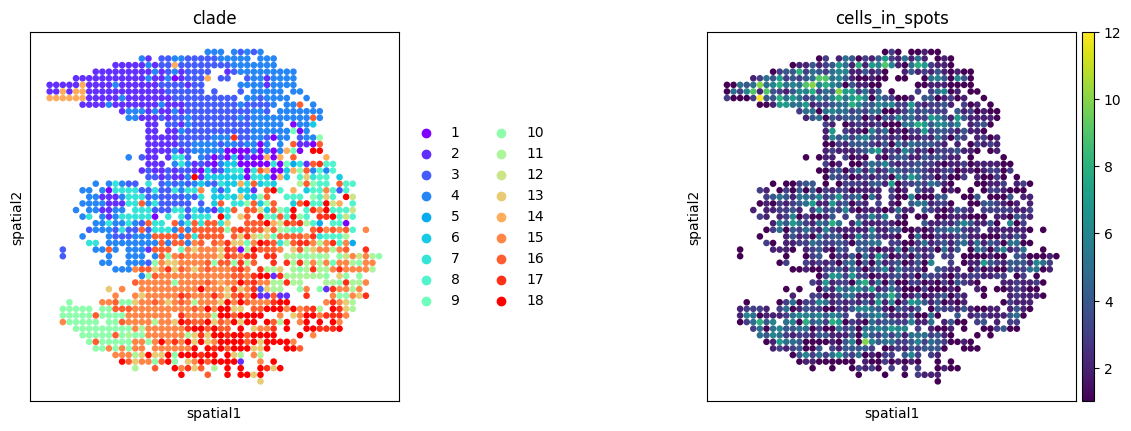

In [39]:
sc.pl.spatial(sdata_slice, color=['clade', 'cells_in_spots'], spot_size=.02,)

# Map single-cell data to spots and learn alphas

In [40]:
sdata_slice.layers['counts'] = sdata_slice.X.copy()
sc.pp.normalize_total(sdata_slice)
sc.pp.log1p(sdata_slice)

In [41]:
from scipy.spatial.distance import squareform, pdist

# Get distance matrices
tdata_slice = tdata_slice[tdata_slice.obs['clade'].sort_values().index]
py.tl.tree_distance(tdata_slice)
tree_distance_matrix = tdata_slice.obsp['tree_distances']
tree_distance_matrix = tree_distance_matrix / tree_distance_matrix.max()
tree_distance_matrix = pd.DataFrame(tree_distance_matrix, index=tdata_slice.obs.index, columns=tdata_slice.obs.index)
sdata_slice = sdata_slice[sdata_slice.obs['clade'].sort_values().index]
spatial_distance_matrix = squareform(pdist(sdata_slice.obsm['spatial'], metric='euclidean'))
spatial_distance_matrix = spatial_distance_matrix / spatial_distance_matrix.max()
spatial_distance_matrix = pd.DataFrame(spatial_distance_matrix, index=sdata_slice.obs.index, columns=sdata_slice.obs.index)

# Get true couplings
true_couplings = np.zeros((tdata_slice.shape[0], sdata_slice.shape[0]))
for i, cell in enumerate(tdata_slice.obs.index):
    spot = tdata_slice.obs.loc[cell, 'spot']
    spot_idx = np.where(sdata_slice.obs.index == spot)[0][0]
    true_couplings[i, spot_idx] = 1

/home/pedro/miniconda3/envs/benchmark_env/lib/python3.10/site-packages/pycea/tl/tree_distance.py:280: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  tdata.uns[f"{key_added}_distances"] = param_dict


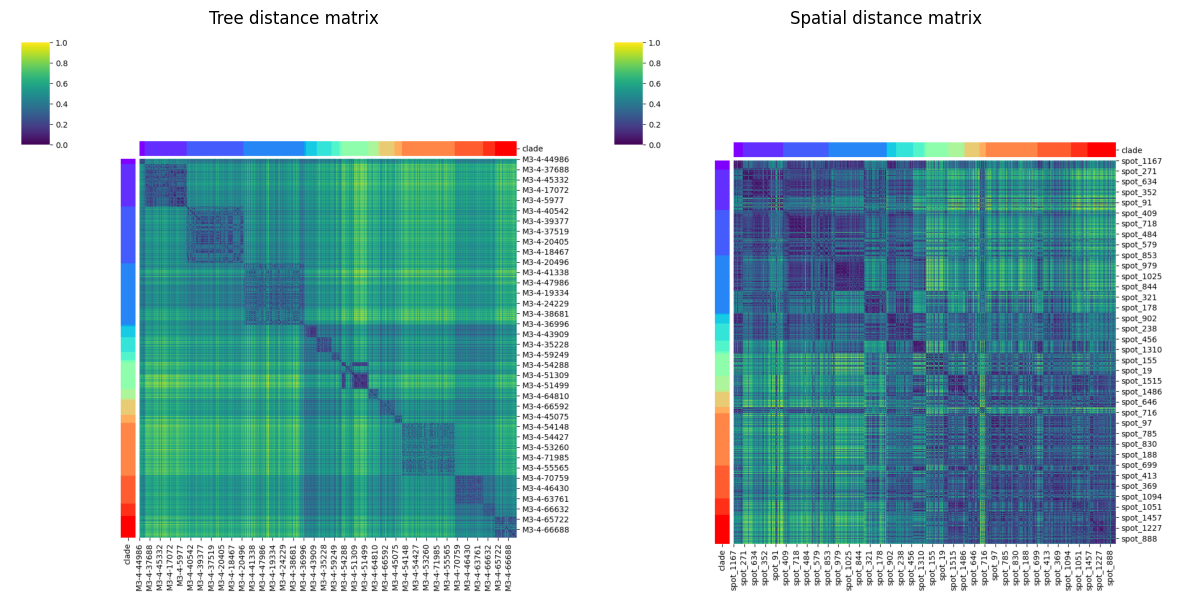

In [42]:
import seaborn as sns
lut = dict(zip(tdata_slice.obs['clade'].unique(), tdata_slice.uns['clade_colors']))
row_colors = tdata_slice.obs['clade'].map(lut)
g1 = sns.clustermap(tree_distance_matrix, row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors, cmap='viridis')

row_colors = sdata_slice.obs['clade'].map(lut)
g2 = sns.clustermap(spatial_distance_matrix, row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors, cmap='viridis')

g1.figure.canvas.draw()
g2.figure.canvas.draw()

img1 = np.array(g1.figure.canvas.renderer.buffer_rgba())
img2 = np.array(g2.figure.canvas.renderer.buffer_rgba())

plt.close(g1.figure)
plt.close(g2.figure)

# Combine into one figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].set_title('Tree distance matrix')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Spatial distance matrix')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [66]:
file_path = os.path.join(os.getcwd(), "../src/spotr/", "spotr.py")
spec = importlib.util.spec_from_file_location("spotr", file_path)
spotr = importlib.util.module_from_spec(spec)
spec.loader.exec_module(spotr)

In [69]:
# tdata_slice.X = tdata_slice.layers['counts'].copy()
import jax
jax.config.update("jax_debug_nans", True)

In [72]:
# Run SpOTr
res = spotr.run_spotr(tdata_slice, sdata_slice, tree_distance_matrix, spatial_distance_matrix,
                                                            tdata_slice.obsm["cell_type"], sdata_slice.uns["markers"],
                                                            clade_column='clade',
                                                            eps=0.1,
                                                            lr=0.01)

100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, loss=9.35e+6]


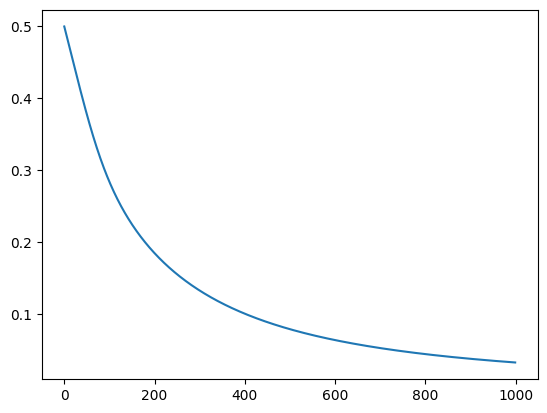

In [75]:
plt.plot(res['alpha_hist'][0])

/tmp/ipykernel_2125214/754247498.py:13: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sdata_slice, color=['clade', 'SpOTr'], spot_size=.02)


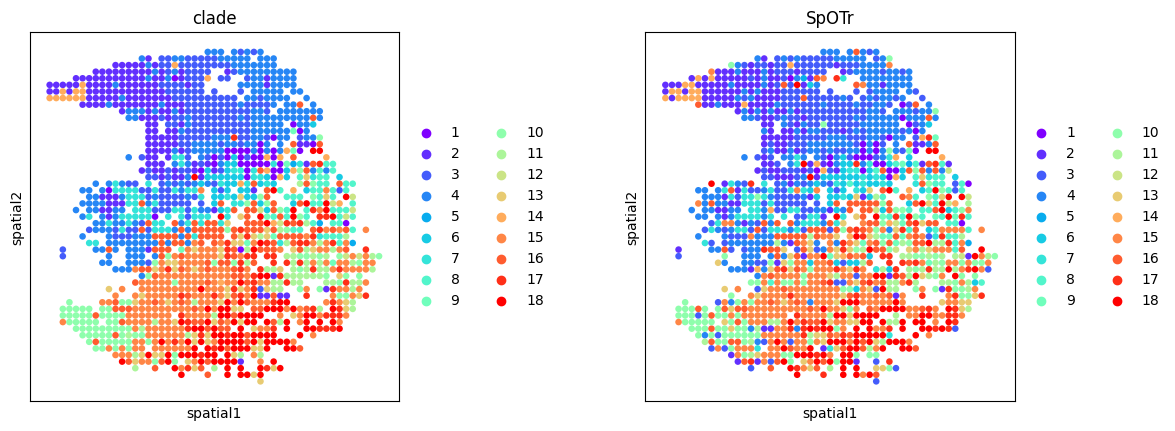

In [78]:
coupling = res['coupling']
n_spots = coupling.shape[1]
inferred_clades_assignments = []
for spot in range(n_spots):
    # Get fraction of cells 
    best_cell_in_spot = int(np.argmax(coupling[:, spot]))
    inferred_clades_assignments.append(tdata_slice.obs.loc[tdata_slice.obs.index[best_cell_in_spot], 'clade'])
sdata_slice.obs['inferred_clade'] = inferred_clades_assignments

# Color the spatial data by the clade of the inferred cells assigned to each spot
sdata_slice.obs['SpOTr'] = inferred_clades_assignments
sdata_slice.uns['SpOTr_colors'] = tdata_slice.uns['clade_colors'].copy()
sc.pl.spatial(sdata_slice, color=['clade', 'SpOTr'], spot_size=.02)


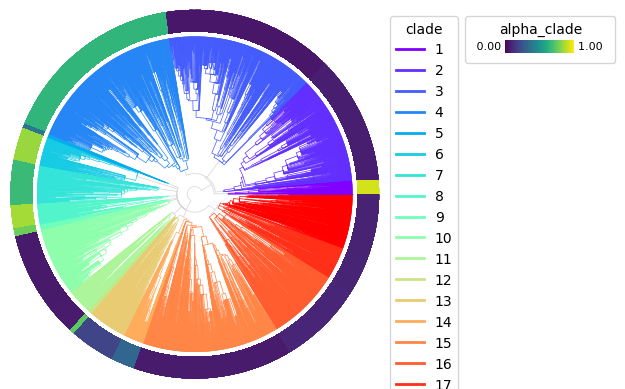

In [122]:
# Annotate tdata_slice.obs['alpha_clade']  
# Beware: each entry in res['alpha_clades'] is a jax array, so convert to float
tdata_slice.obs['alpha_clade'] = tdata_slice.obs['clade'].map(lambda c: float(res['alpha_clades'][c])).astype(float)
tdata_slice.obs['theta_clade'] = tdata_slice.obs['clade'].map(lambda c: float(res['alpha_clades'][c])).astype(float)

py.pl.tree(tdata_slice, depth_key="time", branch_color="clade", palette=clade_palette, polar=True)
ax = py.pl.annotation(tdata_slice, keys="alpha_clade", width=0.15, vmin=0,vmax=1)
ax.figure.figsize = (10, 10)
ax.figure.savefig("alpha_clade.pdf")

In [90]:
tdata_slice['alpha_clade']

TreeData object with n_obs × n_vars = 4562 × 175
    obs: 'sample', 'cell', 'cellBC', 'fov', 'centroid_x', 'centroid_y', 'centroid_z', 'n_layers', 'volume', 'n_genes_by_counts', 'total_counts', 'cell_subtype', 'true_proportion', 'diffusion_proportion', 'background_proportion', 'total_density', 'tumor', 'tumor_boundary_dist', 'within_tumor', 'lung_boundary_dist', 'type', 'clone', 'detection_rate', 'tree', 'fitness', 'clade', 'character_dist_of_relatives', 'local_character_diversity', 'hotspot_module', 'phase', 'edit_frac', 'leiden_cluster', 'slice', 'leiden', 'spot', '_scvi_labels', '_scvi_batch', 'alpha_clade'
    uns: 'clone_characters', 'clone_colors', 'hotspot_module_colors', 'leiden_cluster_colors', 'within_tumor_colors', 'clade_colors', 'n_extant', 'cell_subtype_colors', 'tree_neighbors', 'moranI', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'rank_genes_groups', 'tree_distances', '_scvi_uuid', '_scvi_manager_uuid', 'alpha_clade_colors'
    obsm: 'X_resolVI', 'X_umap', 'characte

/tmp/ipykernel_2125214/1527742229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clade_means = tdata_slice.obs.groupby('clade').agg({'fitness': 'mean', 'theta_clade': 'mean'})


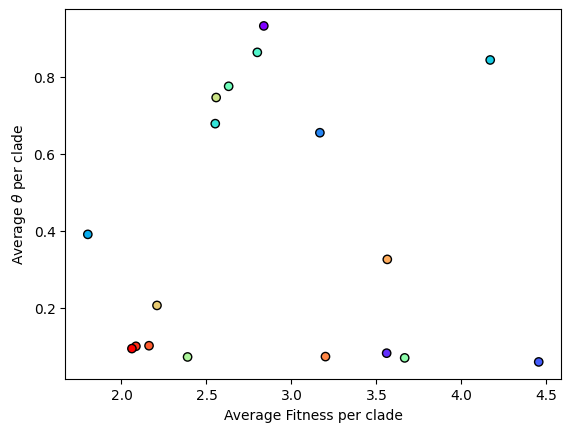

/tmp/ipykernel_2125214/1527742229.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clade_means = tdata_slice.obs.groupby('clade').agg({'theta_clade': 'mean'})


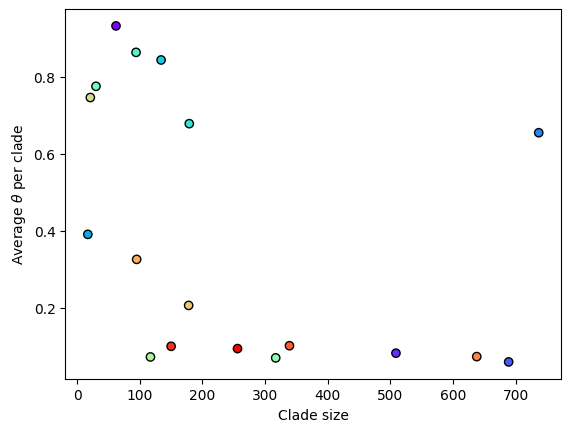

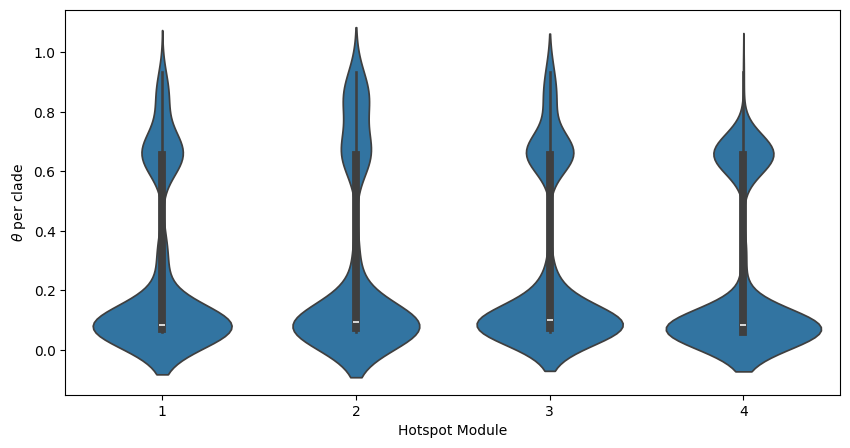

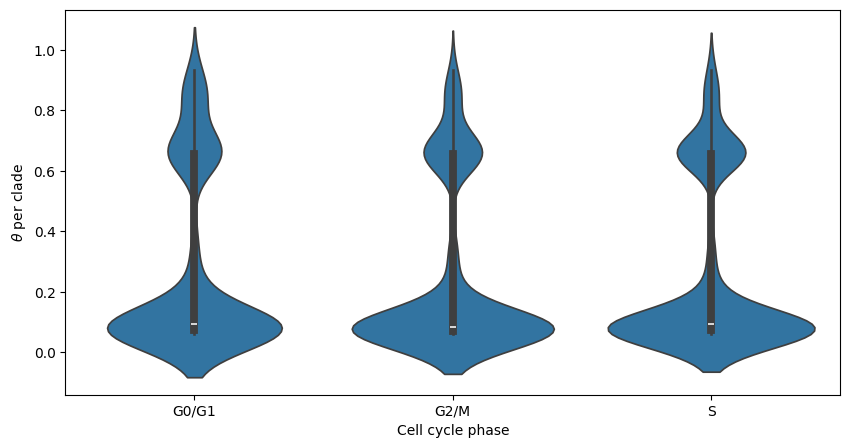

In [127]:
# Show clade-level averages instead of each cell, coloring by clade color
clade_means = tdata_slice.obs.groupby('clade').agg({'fitness': 'mean', 'theta_clade': 'mean'})
clades = clade_means.index.tolist()

# Find the right color mapping for each clade
clade_palette = tdata_slice.uns['clade_colors']
# If clade_palette is a dict, map directly; otherwise, assume order matches clade_categories
if isinstance(clade_palette, dict):
    clade_colors = [clade_palette[str(c)] for c in clades]
else:
    # category order in tdata_slice.obs['clade'].cat.categories
    cats = tdata_slice.obs['clade'].cat.categories
    color_lookup = dict(zip(cats, clade_palette))
    clade_colors = [color_lookup[str(c)] for c in clades]

plt.scatter(clade_means['fitness'], clade_means['theta_clade'], c=clade_colors, label=clades, edgecolor='k')
plt.xlabel('Average Fitness per clade')
plt.ylabel(r'Average $\theta$ per clade')
plt.show()

# Show clade-level clade size (number of cells) instead of fitness, coloring by clade color
clade_means = tdata_slice.obs.groupby('clade').agg({'theta_clade': 'mean'})
clade_sizes = tdata_slice.obs['clade'].value_counts().sort_index()
clades = clade_means.index.tolist()

# Get colors as before
if isinstance(clade_palette, dict):
    clade_colors = [clade_palette[str(c)] for c in clades]
else:
    cats = tdata_slice.obs['clade'].cat.categories
    color_lookup = dict(zip(cats, clade_palette))
    clade_colors = [color_lookup[str(c)] for c in clades]

plt.scatter(clade_sizes.values, clade_means['theta_clade'], c=clade_colors, label=clades, edgecolor='k')
plt.xlabel('Clade size')
plt.ylabel(r'Average $\theta$ per clade')
plt.show()

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(
    data=tdata_slice.obs,
    x='hotspot_module',
    y='theta_clade',
    order=sorted(tdata_slice.obs['hotspot_module'].dropna().unique())
)
plt.xlabel('Hotspot Module')
plt.ylabel(r'$\theta$ per clade')
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(
    data=tdata_slice.obs,
    x='phase',
    y='theta_clade',
    order=sorted(tdata_slice.obs['phase'].dropna().unique())
)
plt.xlabel('Cell cycle phase')
plt.ylabel(r'$\theta$ per clade')
plt.show()

In [95]:
res['spot_scales']

Array([[7.705944 ],
       [7.7031517],
       [7.7110004],
       ...,
       [7.6934524],
       [7.6852036],
       [7.6512284]], dtype=float32)

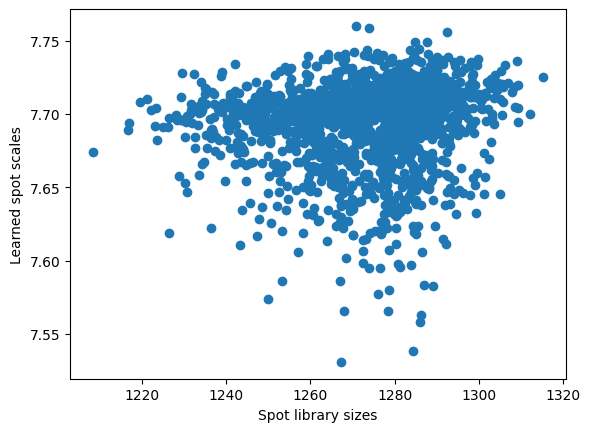

In [101]:
# Compare inferred spot scales with empirical spot scales

plt.scatter(np.sum(sdata_slice.layers['counts'], axis=1), res['spot_scales'].ravel())
plt.xlabel('Spot library sizes')
plt.ylabel('Learned spot scales')
plt.show()

In [110]:
file_path = os.path.join(os.getcwd(), "../src/spotr/", "spotr.py")
spec = importlib.util.spec_from_file_location("spotr", file_path)
spotr = importlib.util.module_from_spec(spec)
spec.loader.exec_module(spotr)

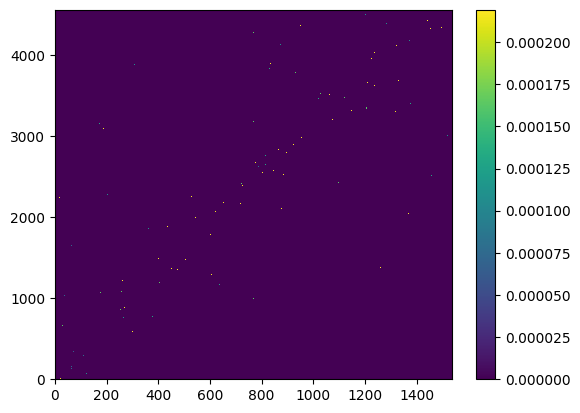

In [109]:
# a = np.ones(tdata_slice.shape[0]) / tdata_slice.shape[0]
# b = np.ones(sdata_slice.shape[0]) / sdata_slice.shape[0]
# true_coupling_scaled, _, _ = spotr.coupling_from_binary(true_couplings, a=a, b=b)
plt.pcolormesh(true_coupling_scaled)
plt.colorbar()
plt.show()

In [112]:
true_res = spotr.run_spotr_coupled(tdata_slice, sdata_slice, tree_distance_matrix, spatial_distance_matrix, true_coupling_scaled,
                                                            clade_column='clade',
                                                            eps=0.1,
                                                            lr=0.01)

100%|██████████| 1000/1000 [01:37<00:00, 10.27it/s, loss=3.64]


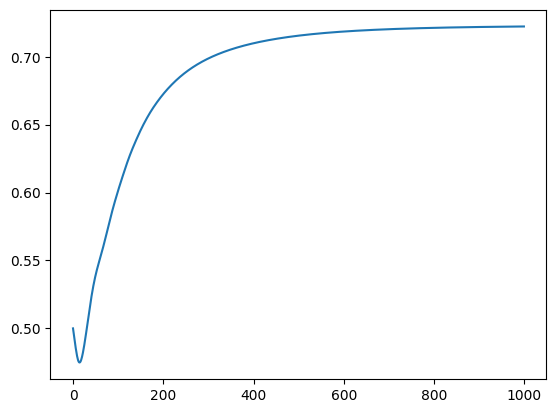

In [117]:
plt.plot(true_res['alpha_hist'][0])
plt.show()

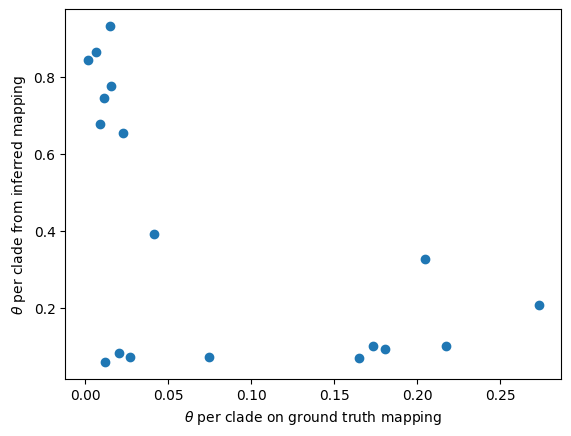

In [120]:
# Get true alpha clades and compare with inferred
plt.scatter(list(true_res['alpha_clades'].values()), list(res['alpha_clades'].values()))
plt.xlabel(r'$\theta$ per clade on ground truth mapping')
plt.ylabel(r'$\theta$ per clade from inferred mapping')
plt.show()

### Alternative methods

In [47]:
results_rows = []
clade_column = 'clade_depth4'

In [51]:
C_feature, C_tree, C_space, a, b = spotr.prepare_ot_inputs(tdata_slice, sdata_slice, tree_distance_matrix.values, spatial_distance_matrix.values)
true_structure_score_level0 = utils.structural_concordance(C_tree, C_space, true_couplings)

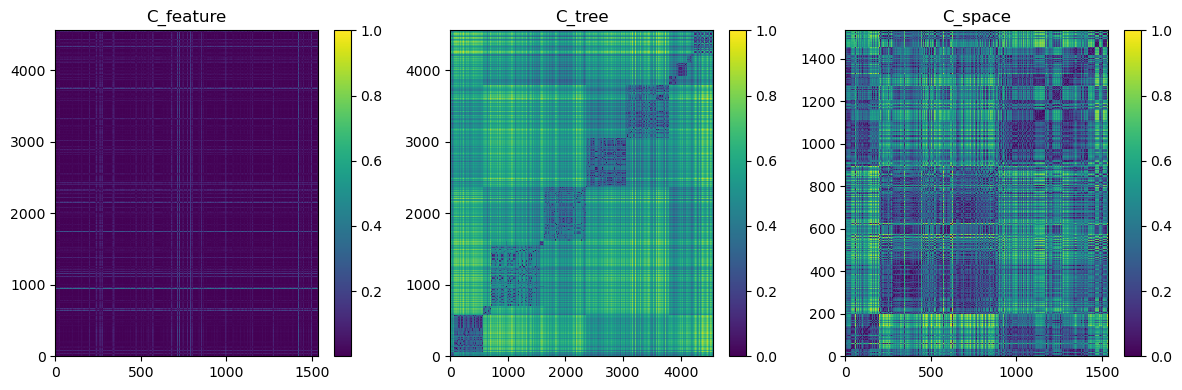

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

im0 = axs[0].pcolormesh(np.array(C_feature), cmap='viridis')
axs[0].set_title('C_feature')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].pcolormesh(np.array(C_tree), cmap='viridis')
axs[1].set_title('C_tree')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].pcolormesh(np.array(C_space), cmap='viridis')
axs[2].set_title('C_space')
fig.colorbar(im2, ax=axs[2])
plt.tight_layout()
plt.show()

In [132]:
def run_methods(ss_simulated_adata, spatial_simulated_adata, tree_distance_matrix, spatial_distance_matrix, clade_column='clade',
                methods=['Wasserstein OT', 'GW OT', 'SpOTr', 'scDOT', 'DestVI'],):
    results_rows = []

    C_feature, C_tree, C_space, a, b = spotr.prepare_ot_inputs(ss_simulated_adata, spatial_simulated_adata, tree_distance_matrix.values, spatial_distance_matrix.values)
    
    
    if 'Wasserstein OT' in methods:
        print("Wasserstein OT")
        # Run Wasserstein OT
        coupling, _ = spotr.sinkhorn_fgw(C_feature, C_tree, C_space, a, b, 0.01, T_sinkhorn=100, J_alt=1, 
                                    alpha=0.0, gamma0=None, uv0=None)
        utils.compute_inferred_clade_fractions(ss_simulated_adata, coupling, spatial_simulated_adata, clade_column=clade_column)
        mean_pearson_corr, per_clade_corrs = utils.compute_clades_pearson_corr(spatial_simulated_adata.obsm[f'{clade_column}_fractions'], spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'], return_all=True)

        results_rows.append({
            'method': 'Wasserstein OT',
            'pcorr': mean_pearson_corr,
            'per_clade_corrs': per_clade_corrs,
        })

    if 'GW OT' in methods:
        print("GW OT")
        # Run GW OT
        coupling, _ = spotr.sinkhorn_fgw(C_feature, C_tree, C_space, a, b, .01, T_sinkhorn=100, J_alt=20, alpha=1.0, gamma0=coupling, uv0=None) # start from WT 
        utils.compute_inferred_clade_fractions(ss_simulated_adata, coupling, spatial_simulated_adata, clade_column=clade_column)
        mean_pearson_corr, per_clade_corrs = utils.compute_clades_pearson_corr(spatial_simulated_adata.obsm[f'{clade_column}_fractions'], spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'], return_all=True)

        results_rows.append({
            'method': 'GW OT',
            'pcorr': mean_pearson_corr,
            'per_clade_corrs': per_clade_corrs,
        })

    if 'SpOTr' in methods:
        print("SpOTr")
        # Run SpOTr
        res = spotr.run_spotr(ss_simulated_adata, spatial_simulated_adata, tree_distance_matrix, spatial_distance_matrix,
                                                                    ss_simulated_adata.obsm["cell_type"], spatial_simulated_adata.uns["markers"],
                                                                    clade_column=clade_column,
                                                                    eps=0.1,
                                                                    lr=0.01)
        coupling = res['coupling']
        utils.compute_inferred_clade_fractions(ss_simulated_adata, coupling, spatial_simulated_adata, clade_column=clade_column)
        mean_pearson_corr, per_clade_corrs = utils.compute_clades_pearson_corr(spatial_simulated_adata.obsm[f'{clade_column}_fractions'], spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'], return_all=True)


        results_rows.append({
            'method': 'SpOTr',
            'pcorr': mean_pearson_corr,
            'per_clade_corrs': per_clade_corrs,
        })

    if 'scDOT' in methods:
        print("scDOT")
        # scDOT
        _, coupling = scdot.train_scdot(ss_simulated_adata, spatial_simulated_adata)
        coupling = coupling.T
        utils.compute_inferred_clade_fractions(ss_simulated_adata, coupling, spatial_simulated_adata, clade_column=clade_column)
        mean_pearson_corr, per_clade_corrs = utils.compute_clades_pearson_corr(spatial_simulated_adata.obsm[f'{clade_column}_fractions'], spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'], return_all=True)


        results_rows.append({
            'method': 'scDOT',
            'pcorr': mean_pearson_corr,
            'per_clade_corrs': per_clade_corrs,
        })

    if 'DestVI' in methods:
        print("DestVI")
        # DestVI
        sc_model = destvi.fit_scLVM(ss_simulated_adata, labels_key=clade_column)
        spatial_simulated_adata.layers["counts"] = spatial_simulated_adata.X.copy()
        st_model = destvi.fit_stLVM(spatial_simulated_adata, sc_model)
        props = st_model.get_proportions()
        spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'] = props
        mean_pearson_corr, per_clade_corrs = utils.compute_clades_pearson_corr(spatial_simulated_adata.obsm[f'{clade_column}_fractions'], spatial_simulated_adata.obsm[f'inferred_{clade_column}_fractions'], return_all=True)

        results_rows.append({
            'method': 'DestVI',
            'pcorr': mean_pearson_corr,
            'per_clade_corrs': per_clade_corrs,
        })

    if "SpOTr" in methods:
        return results_rows, res
    else:
        return results_rows, None

In [130]:
tdata_slice.X = tdata_slice.X.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [133]:
res, spotr_out = run_methods(tdata_slice, sdata_slice, tree_distance_matrix, spatial_distance_matrix, methods=['Wasserstein OT', 'GW OT', 'scDOT', 'DestVI', 'SpOTr'], clade_column='clade')

Wasserstein OT
GW OT
SpOTr


100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s, loss=9.35e+6]


scDOT


/home/pedro/.local/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/pedro/.local/lib/python3.10/site-packages/ipyk ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/pedro/.local/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/pedro/.local/lib/python3.10/site-packages/ipyk ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DestVI


/home/pedro/.local/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training:   0%|          | 0/300 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=300` reached.
/home/pedro/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/pedro/.local/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/pedro/.local/lib/python3.10/site-packages/ipyk ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/pedro/.local/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun py

Training:   0%|          | 0/2500 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2500` reached.


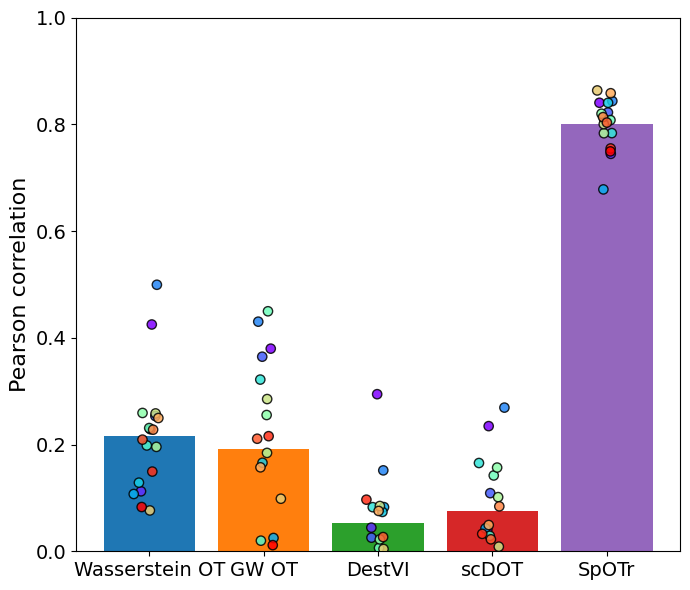

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the results to a DataFrame if not already
results_df = pd.DataFrame(res)

# Sort the methods in the specified order
preferred_method_order = ["Wasserstein OT", "GW OT", "DestVI", "scDOT", "SpOTr"]
if 'method' in results_df.columns:
    # Sort, keeping only those methods present but in the correct order
    method_categories = [m for m in preferred_method_order if m in results_df['method'].values]
    results_df['method'] = pd.Categorical(results_df['method'], categories=method_categories, ordered=True)
    results_df = results_df.sort_values('method')

# Load clade colormap from AnnData, if available (tdata_slice uns); fallback to default if not present
clade_colors_dict = None
if hasattr(tdata_slice, "uns") and "clade_colors" in tdata_slice.uns:
    clades = tdata_slice.obs['clade'].cat.categories if hasattr(tdata_slice.obs['clade'], "cat") else sorted(tdata_slice.obs['clade'].unique())
    clade_colors_dict = {str(k): v for k, v in zip(clades, tdata_slice.uns["clade_colors"])}
    clade_colors = [clade_colors_dict[str(clade)] for clade in clades]
else:
    clade_colors = plt.cm.tab20.colors  # fallback, up to 20

fig, ax = plt.subplots(figsize=(7, 6))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Extend if needed
bars = ax.bar(results_df['method'], results_df['pcorr'], color=bar_colors[:len(results_df)])

ax.set_ylabel('Pearson correlation', fontsize=16)
# ax.set_xlabel('Method', fontsize=16)
ax.set_ylim(0, 1)

# Set tick fontsize
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Overlay dots for per_clade_corrs
rng = np.random.default_rng(42)  # for reproducibility

# Try to use tdata_slice.obs['clade'].cat.categories ordering, fallback to index order
if hasattr(tdata_slice.obs['clade'], "cat"):
    clade_labels = list(map(str, tdata_slice.obs['clade'].cat.categories))
else:
    clade_labels = list(map(str, sorted(tdata_slice.obs['clade'].unique())))

for idx, (i, row) in enumerate(results_df.iterrows()):
    clade_corrs = row['per_clade_corrs']
    yvals = clade_corrs if (hasattr(clade_corrs, "__iter__") and not isinstance(clade_corrs, str)) else [clade_corrs]
    yvals = np.array(yvals)
    # Choose coloring: if number of yvals matches clade_colors, color by clade
    if clade_colors_dict is not None and len(yvals) == len(clade_labels):
        dot_colors = [clade_colors_dict[clade] for clade in clade_labels]
    else:
        dot_colors = [bar_colors[idx % len(bar_colors)]] * len(yvals)  # fallback
    jitter = rng.normal(loc=0, scale=0.07, size=len(yvals))
    xvals = np.array([idx] * len(yvals)) + jitter
    ax.scatter(
        xvals, yvals,
        color=dot_colors,
        edgecolor="k",
        s=45,
        alpha=0.85,
        linewidth=1,
        zorder=10
    )

plt.tight_layout()
plt.show()


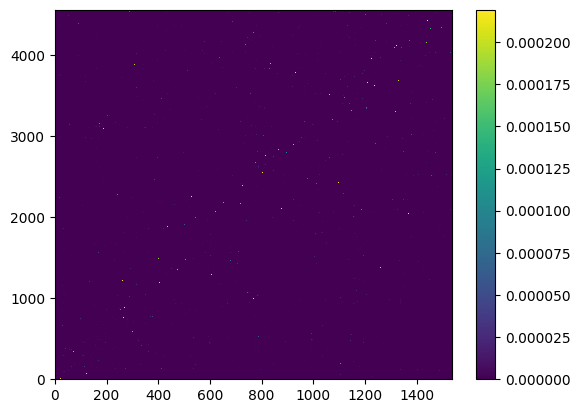

In [136]:
plt.pcolormesh(spotr_out['coupling'])
plt.colorbar()
plt.show()